In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import KFold

from tensorflow.keras import metrics

plt.rcParams.update({'font.size':14})

In [2]:
def load_dataset():
    
    (trainX, trainY), (testX, testY) = mnist.load_data()

    trainX  = np.expand_dims(trainX, axis=3)
    testX   = np.expand_dims(testX, axis=3)
    trainY  = to_categorical(trainY)
    testY   = to_categorical(testY)

    return trainX, trainY, testX, testY

In [3]:
def prep_pixels(trainX, testX):
    
    trainX = trainX.astype('float32')
    testX  = testX.astype('float32')

    # Normalizing data between [0,1]
    train_X= trainX/trainX.max()
    test_X = testX/testX.max()

    return train_X, test_X

In [4]:
trainX, trainY, testX, testY  = load_dataset()

In [5]:
train_X, test_X = prep_pixels(trainX, testX)

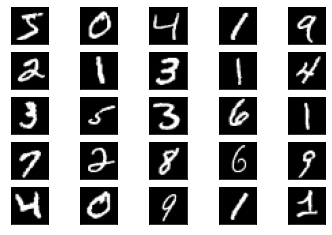

In [6]:
columns = 5
rows= 5
ix=1
count = 0

for i in range(rows):
      for j in range(columns):

        ax = plt.subplot(rows, columns, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(train_X[count,:,:,0], cmap='gray')

        ix+=1
        count+=1
plt.show()

In [7]:
def define_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='random_uniform', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='random_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=100, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    opt = Adam(0.01)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

  

In [8]:
def evaluate_model(dataX, dataY, n_folds):
    
    scores    = []
    histories = []
    models    = []

    kfold     = KFold(n_folds, shuffle=True, random_state=1)
    


    for i, j in kfold.split(dataX):

        model = define_model()
        trainX, trainY, testX, testY = dataX[i], dataY[i], dataX[j], dataY[j]
        history = model.fit(trainX, trainY, epochs=5, batch_size=64, validation_data=(testX, testY), verbose=0)
        _,acc   = model.evaluate(testX, testY, verbose=0)

        scores.append(acc)
        histories.append(history)
        models.append(model)

        print(acc*100)
    
    return scores, histories, models

In [9]:
scores, histories, models = evaluate_model(train_X, trainY, n_folds=2)

97.5433349609375
98.06666374206543


In [10]:
m1, m2 = models

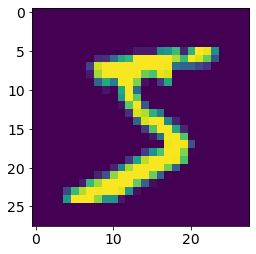

In [11]:
plt.imshow(train_X[0,:,:,0])

In [12]:
m1.predict_classes(train_X[0:1,:,:,:])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5], dtype=int64)

In [13]:
train_X[1,:,:,0].shape

(28, 28)

In [14]:
train_X[1:2,:,:,:].shape

(1, 28, 28, 1)

In [15]:
m2.predict(test_X[0:1,:,:,:])

array([[5.6573879e-10, 3.1918553e-08, 2.3931438e-08, 1.8268205e-06,
        8.4138463e-08, 1.8418640e-09, 8.8674632e-14, 9.9998093e-01,
        1.5557208e-10, 1.7023058e-05]], dtype=float32)

In [16]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               460900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 471,478
Trainable params: 471,478
Non-trainable params: 0
________________________________________________